<a href="https://colab.research.google.com/github/anoopjakob/Machine_Learning_Assignments/blob/main/machine_learning_lab_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

**Assignment 1**. Given a perceptron with weight vector (w1, w2)

T = (1, 1)T and bias w0 = 2, plot

the partition of R
2
that is realized by this perceptron and mark the area where the

perceptron outputs 1.


**Answer**

The linear equation for a perceptron is
>$\sum_{i=1}^n w_i.x_i + w_n+_1*b = 0 $

for two input perceptron 
>$ w_1⋅x_1+w_2⋅x_2+w_3⋅b=0 $

this is equivalent with
>$ x_2=- \frac{w_1}{w_2}⋅x_1− \frac{w_3}{w_2}⋅b $

Therefore
>$ m = − \frac{w_1}{w_2} $

and 

>$ c=− \frac{w3}{w2}⋅b $

[]

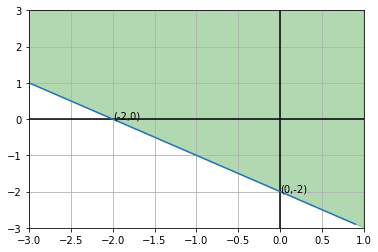

In [238]:
W1 = 1
W2 = 1
W3 = 2


fig, ax = plt.subplots()

xmin, xmax = -3, 1
X = np.arange(xmin, xmax, 0.1)

ax.set_xlim([xmin, xmax])
ax.set_ylim([-3, 3])

plt.axhline(0, color='black')
plt.axvline(0, color='black')

ax.grid(True)


m = -W1/W2
c= -W3/W2
ax.plot(X, m * X + c, label="decision boundary" )
ax.text(-2,0,s="(-2,0)")
ax.text(0,-2,s="(0,-2)")

plt.fill_between([-3,1], [1,-3], 4, 
                 color='green', 
                 alpha=0.3) 
plt.plot()

**Assignment 2 .** Implement OR logic function of three variables: y = f(x1, x2, x3), where y ∈ {−1, +1},

xi ∈ {0, 1} using a single perceptron. Give a boolean expression describing your function. Derive the weight vector using two methods:
 (Create a data set by just listing the truth table - represent FALSE by -1 and TRUE by +1)

(a) by working out the equation of the decision plane,

(b) by training using the perceptron learning algorithm that we discussed in the first
lecture.


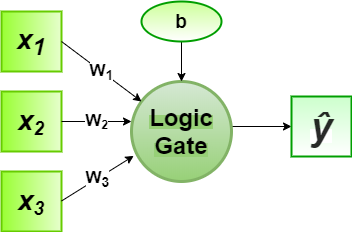



## Percepron Algorithm

In [221]:

class Perceptron(object):
    """Implements a perceptron network"""
    def __init__(self, input_size, lr=1, epochs=100):
        self.W = np.zeros(input_size+1)
        # add one for bias
        self.epochs = epochs # no of iterations
        self.lr = lr # learning rate
    
    def activation_fn(self, x): # simple step function
        return 1 if x >= 0 else 0
 
    def predict(self, x):
        z = np.dot(self.W,x)
        a = self.activation_fn(z)
        return a
 
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1) # for setting the bias input to 1
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x

## Main function to Train

In [226]:
if __name__ == '__main__':
 #FOR TRAINING
    X = np.array([
      [0, 0, 0], 
      [0, 0, 1], 
      [0, 1, 0], 
      [0, 1, 1], 
      [1, 0, 0], 
      [1, 0, 1], 
      [1, 1, 0], 
      [1, 1, 1] 
    ])
    d = np.array([0, 1, 1, 1, 1,1,1,1]) # TRUTH TABLE FOR THE OR FUNCTION

    perceptron = Perceptron(input_size=3)
    perceptron.fit(X, d) #training
    # print(perceptron.W)
    weights = perceptron.W # wieghts after training
    #y = mx +c
    # m = slope 

    print("The Weights and Bias after training are : \n")
    print("bias= {}, w1= {} , w2= {}, w3= {}".format(weights[0], weights[1], weights[2],weights[3]) )


The Weights and Bias after training are : 

bias= -1.0, w1= 1.0 , w2= 1.0, w3= 1.0


## Output / Prediction



In [227]:
#Testing

def TruthTable(X):
  x = np.insert(X,0,1)
  y=perceptron.predict(x)
  return y

dataset = np.array([ 
     [0, 0, 0], 
     [0, 0, 1], 
     [0, 1, 0], 
     [0, 1, 1], 
     [1, 0, 0], 
     [1, 0, 1], 
     [1, 1, 0], 
     [1, 1, 1] 
   ]) 
print("Inputs  Predicted_Output")
for i in range(len(dataset)):
  print(" {}   {}".format(dataset[i], TruthTable(dataset[i])))

Inputs  Predicted_Output
 [0 0 0]   0
 [0 0 1]   1
 [0 1 0]   1
 [0 1 1]   1
 [1 0 0]   1
 [1 0 1]   1
 [1 1 0]   1
 [1 1 1]   1


In [228]:

# Trying Prediction

# This function predicts the output and depicts the point in red color if
# its not included and green vice versa

def setColor(X):
  x = np.insert(X,0,1)
  y=perceptron.predict(x)
  
  if y ==0 :
    return "r"
  else:
    return "g"

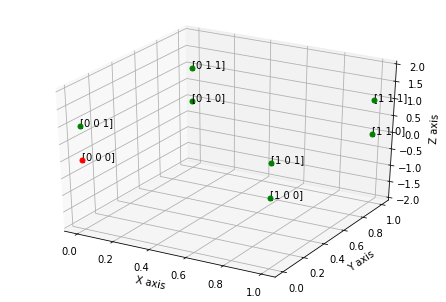

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



fig = plt.figure()
ax = Axes3D(fig)

for i in range(len(dataset)):
    ax.scatter(dataset[i][0],dataset[i][1],dataset[i][2],c=setColor(dataset[i]),s=25, marker="o")
    ax.text(dataset[i][0],dataset[i][1],dataset[i][2],s=str(dataset[i]))
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')


# ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
# ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)

ax.set_zlim(-2, 2)

plt.show()

In [216]:
# rough work area

s= np.array([2,3,3])
np.insert(s, 0 ,1)

array([1, 2, 3, 3])